Import

In [11]:
# Imported library
import os
import numpy as np
import logging
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices
import cv2

Dataset

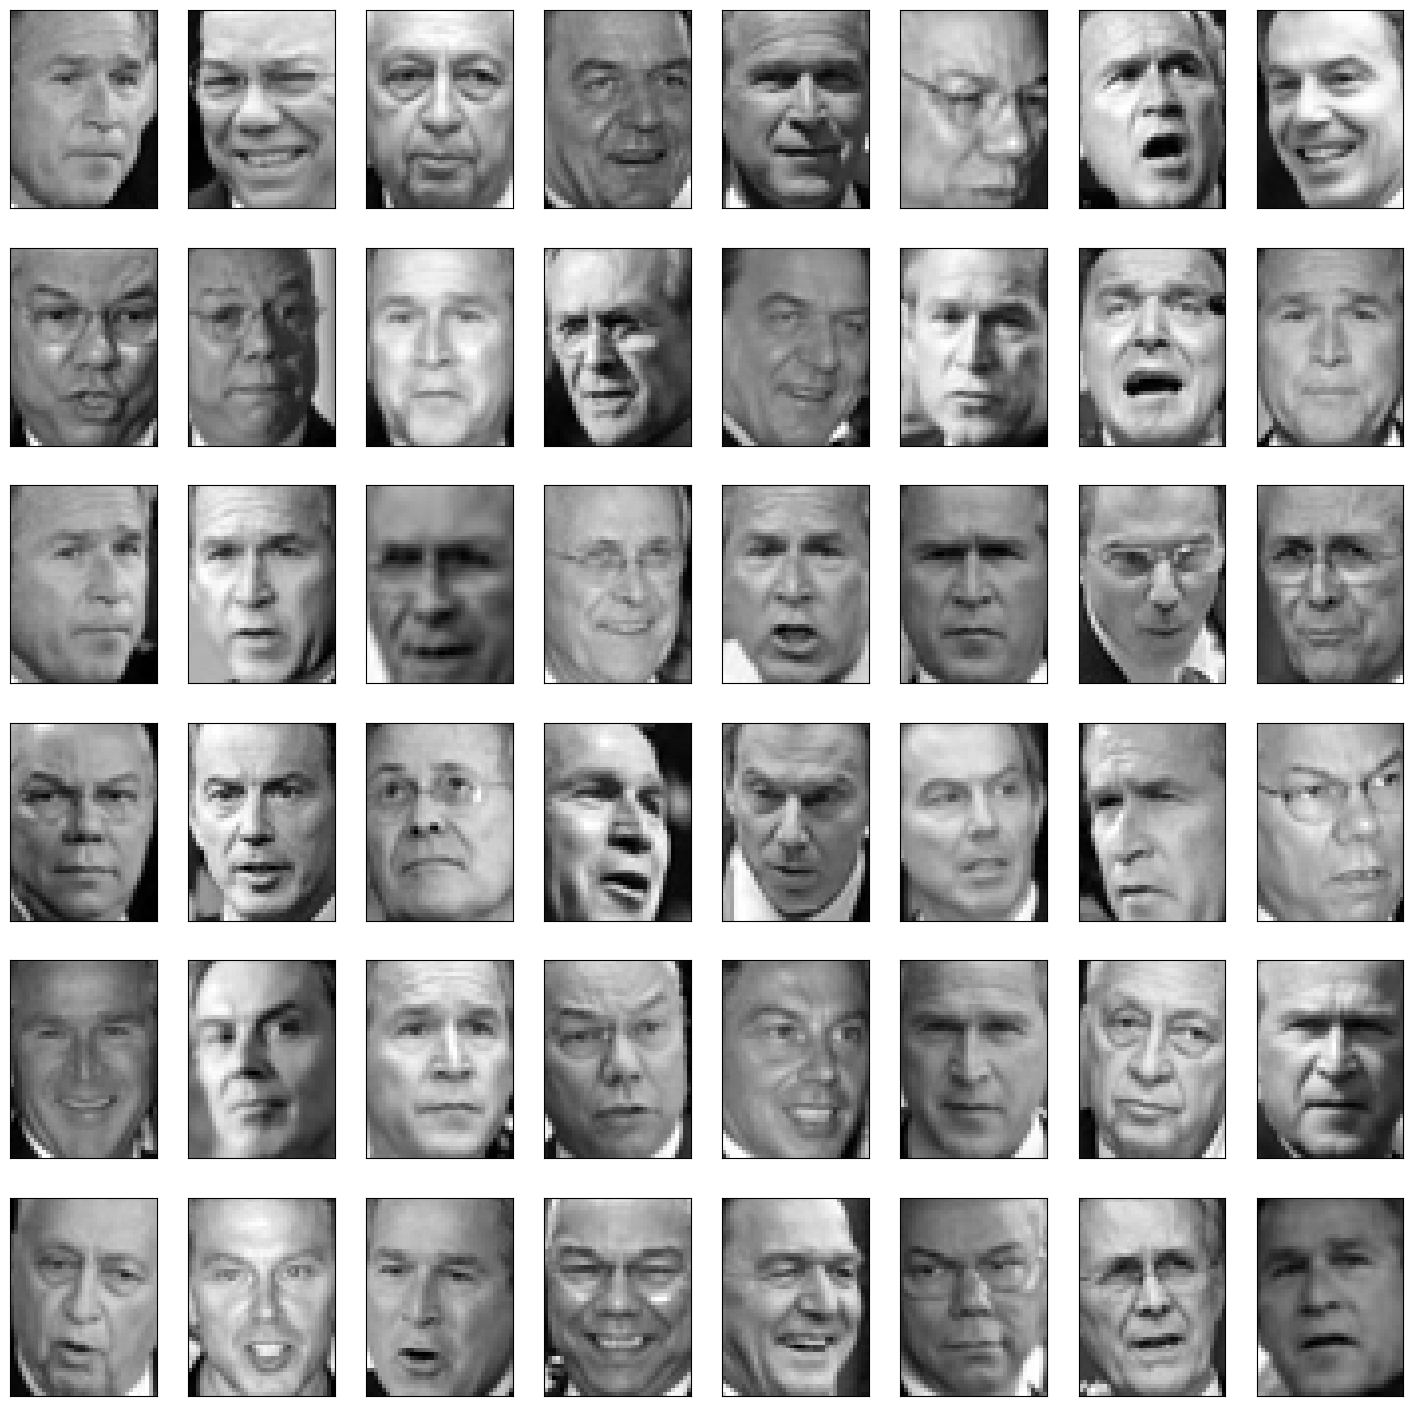

In [12]:
# Imported library
from sklearn.datasets import fetch_lfw_people

# Data initialization
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data/256
y = lfw_people.target
n_samples, h, w = lfw_people.images.shape
X = lfw_people.images.reshape((lfw_people.images.shape[0], -1))
X = X.T

# Data display
plt.rcParams["figure.figsize"] = (18,18)
plt.gray()
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(X[:,i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()

NMF

In [13]:
def initialize_nmf(V, k):
    # Dimensions initializations
    m, n = V.shape
    
    # Random matrix initialization
    W = np.random.rand(m, k)
    H = np.random.rand(k, n)
    
    return W, H

In [14]:
def update_W(V, W, H):
    # Separate calculation of numerator and denominator
    numerator = np.dot(V, H.T)
    denominator = np.dot(np.dot(W, H), H.T + 1e-9)

    # W update
    W *= numerator / denominator
    
    return W

In [15]:
def update_H(V, W, H):
    # Separate calculation of numerator and denominator
    numerator = np.dot(W.T, V)
    denominator = np.dot(np.dot(W.T,W),H + 1e-9)

    # H update
    H *= numerator / denominator
    
    return H

In [16]:
def nmf(V, k, max_iter, tol=1e-6):
    # Step 1 : W and H initialization
    W, H = initialize_nmf(V, k)
    
    # Iteration until convergence or max iterations
    for i in range(max_iter):
        # Step 2 - W and H update
        H = update_H(V, W, H)
        W = update_W(V, W, H)
        
        # Cost function
        cost = np.sum((X - np.dot(W, H))**2)
        
        # Check convergence
        if cost < tol:
            print(f"Convergence achieved after. {i+1} iterations.")
            break
    
    return W, H

In [17]:
def calculate_error(X, reconstructed_X):
    # Error calculation
    error = np.sqrt(np.mean((X.T - reconstructed_X.T) ** 2, axis=0))
    return error

Plot NMF

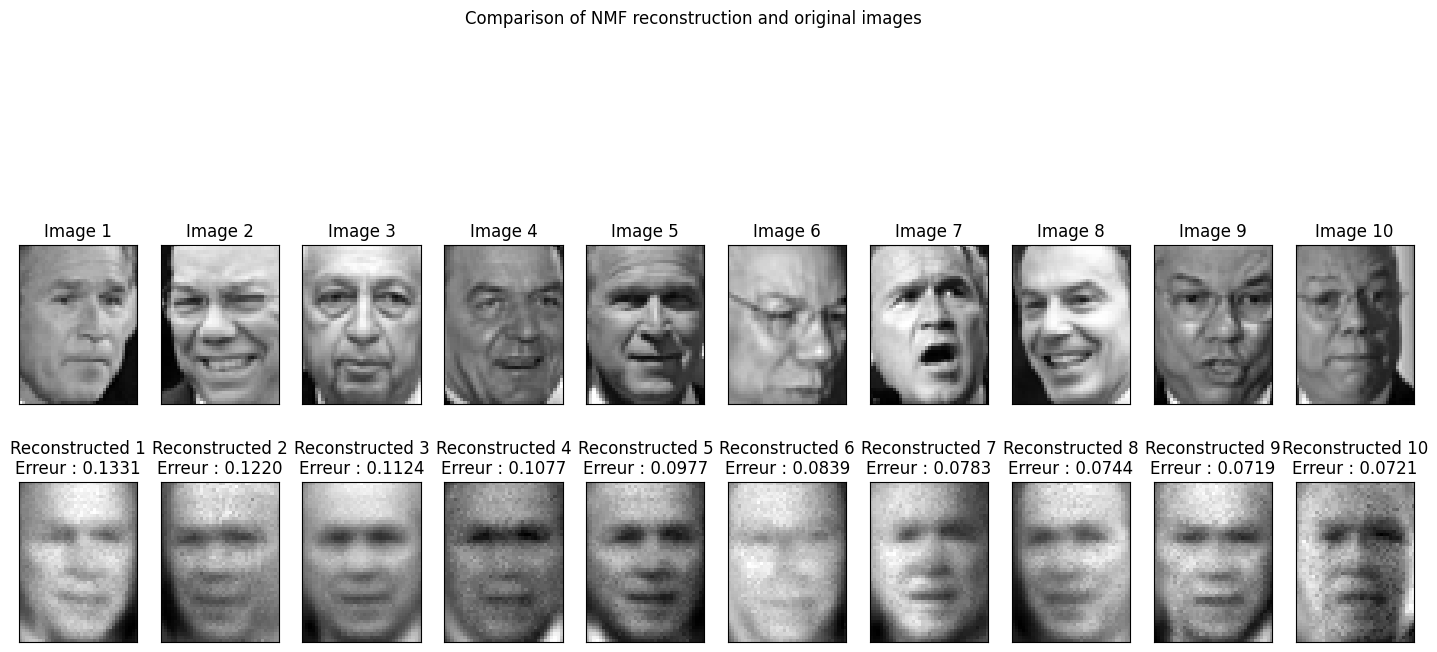

In [23]:
# Initialization of variables
k = 30          # Number of latent components
max_iter = 1000 # Number of iterations

# Non-negative Matrix Factorization by myself
W, H = nmf(X, k, max_iter)

# Data reconstruction
reconstructed_X = np.dot(W,H)

# Error rate
error = calculate_error(X, reconstructed_X)

# Plot display
plt.figure(figsize=(18, 18))
for i in range(10):
    # Original images
    plt.subplot(6, 10, i + 1)
    plt.imshow(X[:, i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Image {i+1}")
    plt.xticks(())
    plt.yticks(())
    
    # Reconstructed images
    plt.subplot(6, 10, 10 + i + 1)
    plt.imshow(reconstructed_X[:, i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Reconstructed {i+1}\nErreur : {error[i]:.4f}")
    plt.xticks(())
    plt.yticks(())
plt.suptitle(f"Comparison of NMF reconstruction and original images", y=1)
# plt.tight_layout()
plt.show()